# Fundamentals of Software Engineering

# Assignment #4

# Eman Furrukh 21i-1726 BSDS-U 

In [1]:
#Complete integrated ML model in GUI (complete functional code)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tkinter as tk

In [5]:
#Load the data
df = pd.read_csv(r"C:\Users\DELL\Downloads\MSFT (1).csv")

print(df.head())

         Date      Open      High       Low     Close  Adj Close      Volume
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.062549  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.064783   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.065899   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.064224    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.063107    47894400


In [6]:
if len(df) < 2:
    raise ValueError("Input data has less than 2 samples")

In [7]:
#Prepare the data
data = df.filter(['Close']).values
#scaler = MinMaxScaler(feature_range=(0, 1))
scaler = MaxAbsScaler()
scaled_data = scaler.fit_transform(data)

In [8]:
#Define the training period
training_days = int(len(data) * 0.8)

#Create the training dataset
train_data = scaled_data[0:training_days, :]

In [9]:
#Split the data into x_train and y_train datasets
x_train = []
y_train = []

timesteps = 60 # number of timesteps to look back
for i in range(timesteps, len(train_data)):
    x_train.append(train_data[i - timesteps:i, 0])
    y_train.append(train_data[i, 0])

#Convert the data to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

In [10]:
#Reshape the data to fit the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [11]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

#Create the test dataset
test_data = scaled_data[training_days - timesteps:, :]

6760/6760 [==============================] - 143s 21ms/step - loss: 9.4436e-05


In [12]:
#Split the data into x_test and y_test datasets
x_test = []
y_test = data[training_days:, :]
for i in range(timesteps, len(test_data)):
    x_test.append(test_data[i - timesteps:i, 0])

In [13]:
#Convert the data to numpy arrays
x_test = np.array(x_test)

#Reshape the data to fit the LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

54/54 [==============================] - 2s 18ms/step


In [14]:
# Create a new dataframe that will hold the predicted values
test_data = data[training_days+timesteps-1:].copy()

# Add the predictions to the new dataframe
test_data['Predictions'] = predictions

# Create a new dataframe that will hold the predicted values
test_data = df[training_days + timesteps:].copy()
test_data['Predictions'] = predictions

# Create a new dataframe that will hold the predicted values
test_data = pd.DataFrame(scaler.inverse_transform(test_data), columns=['Close', 'Predictions'])
test_data['Date'] = df.index[training_days+timesteps-1:]
test_data = test_data.set_index('Date')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

C:\Users\DELL\AppData\Local\Temp\ipykernel_14684\203338185.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  plt.plot(test_data[['Close', 'Predictions']])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

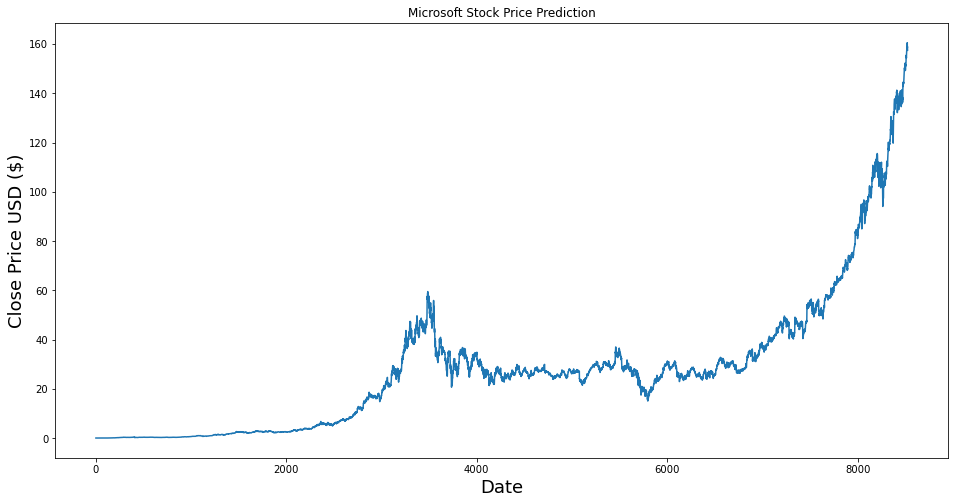

In [15]:
# Visualize the results
plt.figure(figsize=(16, 8))
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df['Close'])
plt.plot(test_data[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [16]:
#Create the GUI
def predict_price():
    # Get the input data
    input_data = entry.get()
    input_data = input_data.split(',')
    input_data = [float(x) for x in input_data]
    # Scale the input data
    scaled_input = scaler.transform(np.array(input_data).reshape(-1, 1))

In [17]:
# Get the model's predicted price value
predicted_price = model.predict(x_input)

#Inverse transform the predicted price value to get the actual price
predicted_price = scaler.inverse_transform(predicted_price)

#Update the output label with the predicted price
output_label.config(text="Predicted price: $%.2f" % predicted_price)

NameError: name 'x_input' is not defined

In [18]:
#Create the GUI
root = tk.Tk()
root.title("Stock Price Prediction")

''

In [19]:
#Create the input label and entry
input_label = tk.Label(root, text="Enter the last 60 days' stock prices separated by commas:")
input_label.pack()

entry = tk.Entry(root)
entry.pack()

In [20]:
#Create the predict button
predict_button = tk.Button(root, text="Predict", command=predict_price)
predict_button.pack()

In [21]:
#Create the output label
output_label = tk.Label(root, text="")
output_label.pack()

In [22]:
#Run the GUI
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\DELL\AppData\Local\Temp\ipykernel_14684\2073023061.py", line 6, in predict_price
    input_data = [float(x) for x in input_data]
  File "C:\Users\DELL\AppData\Local\Temp\ipykernel_14684\2073023061.py", line 6, in <listcomp>
    input_data = [float(x) for x in input_data]
ValueError: could not convert string to float: ''
